<a href="https://colab.research.google.com/github/CardiacModelling/summer-school-2025/blob/main/Myokit_installation_and_example_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Myokit installation and example simulation

In this notebook, we
- install [Myokit](https://myokit.org) in Google Colab
- run an example simulation
- explain the example, with links to the [docs](https://myokit.readthedocs.io/en/stable/)

To install Myokit, we
1. Use `apt-get` to install the required [Sundials](https://computing.llnl.gov/projects/sundials) library
2. Use `pip` to install the package `myokit`

In [1]:
!apt-get install libsundials-dev
!pip install myokit

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsundials-dev is already the newest version (5.8.0+dfsg-1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


Next, we import `myokit` module and make our first call:

In [2]:
import myokit
print(myokit.version())


 Myokit 1.38.0 |/\
_______________|  |_____


That works! For the real test, we'll load the built-in example model and run a 1000ms simulation:

In [3]:
m, p, x = myokit.load('example')
s = myokit.Simulation(m, p)
d = s.run(1000)

INFO:root:running build_ext
INFO:root:building 'myokit_sim_1_1487644342713519436' extension
INFO:root:creating build/temp.linux-x86_64-cpython-312/tmp/tmp2n_k2g3vmyokit
INFO:root:x86_64-linux-gnu-gcc -fno-strict-overflow -Wsign-compare -DNDEBUG -g -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/include -I/usr/local/lib/python3.12/dist-packages/myokit/_sim -I/usr/local/lib/python3.12/dist-packages/myokit/_sim -I/usr/include/python3.12 -c /tmp/tmp2n_k2g3vmyokit/source.c -o build/temp.linux-x86_64-cpython-312/tmp/tmp2n_k2g3vmyokit/source.o
INFO:root:creating build/lib.linux-x86_64-cpython-312
INFO:root:x86_64-linux-gnu-gcc -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -g -fwrapv -O2 build/temp.linux-x86_64-cpython-312/tmp/tmp2n_k2g3vmyokit/source.o -L/usr/local/lib -L/usr/local/lib64 -L/usr/lib/x86_64-linux-gnu -Wl,--enable-new-dtags,-rpath,/usr/local/lib -Wl,--enable-new-dtags,-rpath,/usr/local/lib64 -lsundials_

To visualise the results, we'll use [matplotlib](https://matplotlib.org/):

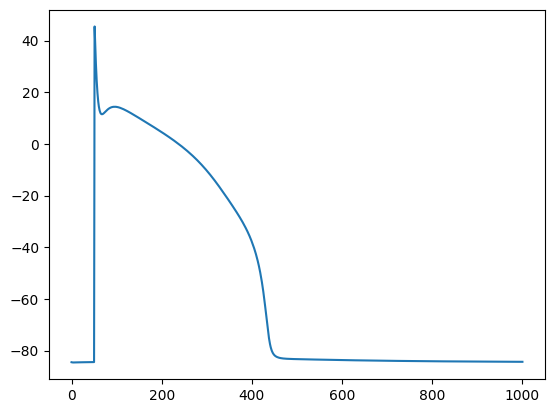

In [4]:
import matplotlib.pyplot as plt
plt.plot(d.time(), d['membrane.V'])
plt.show()

## Tweak: get rid of the logging info

When we created the simulation, it generated a lot of debug output:
```
INFO:root:running build_ext
INFO:root:building 'myokit_sim_1_5499951616817020280' extension
INFO:root:creating build/temp.linux-x86_64-cpython-312/tmp/tmpxss9t8mumyokit
INFO:root:x86_64-linux-gnu-gcc -fno-strict-overflow -Wsign-compare -DNDEBUG -g -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/include -I/usr/local/lib/python3.12/dist-packages/myokit/_sim -I/usr/local/lib/python3.12/dist-packages/myokit/_sim -I/usr/include/python3.12 -c /tmp/tmpxss9t8mumyokit/source.c -o build/temp.linux-x86_64-cpython-312/tmp/tmpxss9t8mumyokit/source.o
INFO:root:creating build/lib.linux-x86_64-cpython-312
INFO:root:x86_64-linux-gnu-gcc -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -g -fwrapv -O2 build/temp.linux-x86_64-cpython-312/tmp/tmpxss9t8mumyokit/source.o -L/usr/local/lib -L/usr/local/lib64 -L/usr/lib/x86_64-linux-gnu -Wl,--enable-new-dtags,-rpath,/usr/local/lib -Wl,--enable-new-dtags,-rpath,/usr/local/lib64 -lsundials_cvodes -lsundials_nvecserial -lm -o build/lib.linux-x86_64-cpython-312/myokit_sim_1_5499951616817020280.cpython-312-x86_64-linux-gnu.so
INFO:root:copying build/lib.linux-x86_64-cpython-312/myokit_sim_1_5499951616817020280.cpython-312-x86_64-linux-gnu.so ->
```
This doesn't really help us much, and can look a bit daunting.
We can get rid of these lines with:

In [5]:
import logging
logging.disable(logging.INFO)

Now we can run without debug output:

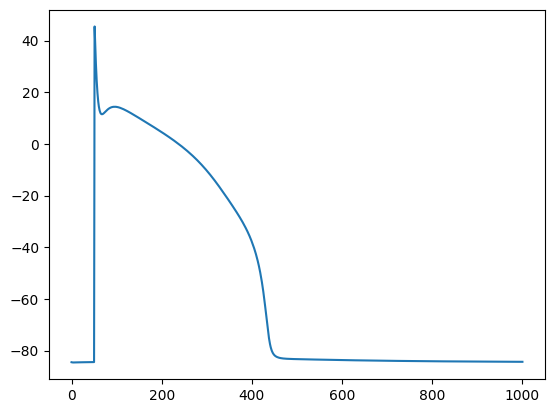

In [6]:
m, p, x = myokit.load('example')
s = myokit.Simulation(m, p)
d = s.run(1000)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(d.time(), d['membrane.V'])
plt.show()

## The same example, line by line

If you'd like a bit more insight into what we just did, we'll now run through the same example code more slowly, explaining each line.

In [7]:
m, p, x = myokit.load('example')

First, we loaded a [Model](https://myokit.readthedocs.io/en/stable/api_core/Model.html), a [Pacing protocol](https://myokit.readthedocs.io/en/stable/api_simulations/Protocol.html), and a script.

Usually, we'd load these from an `.mmt` file, for example
```
m, p, x = myokit.load('my-model.mmt')
```
but here we used the built-in `example` file instead.

The **model** contains all the equations that make up the cell or channel model, along with its initial conditions.

A selection of example models is hosted [here](https://github.com/myokit/models).
To get a feel for what's inside a model, try the [1977 model by Beeler & Reuter](https://github.com/myokit/models/blob/main/c/beeler-1977.mmt).
Then, if you're feeling brave, check out a [modern model](https://github.com/myokit/models/blob/main/c/tomek-2020.mmt).

A **protocol** is used to specify an external input to a model.
For action potential models, this is usually a periodic stimulus current.
For ion channel models, this is typically a voltage-clamping protocol.

We can inspect the protocol we loaded above with

In [8]:
print(p.code())

[[protocol]]
# Level  Start    Length   Period   Multiplier
1.0      50.0     0.5      1000.0   0


This specifies a stimulus of size `1`, starting at 50 time units - let's say milliseconds, lasting 0.5ms, and repeating indefinitely every 1000ms.
To cap the number of repeats, we can set the "multiplier" to a positive number.

The **script** part of an mmt file can be used to bundle an example simulation with a model.
We won't be using this here.

Next, we create a [Simulation](https://myokit.readthedocs.io/en/stable/api_simulations/Simulation.html) that uses the loaded model and protocol:

In [9]:
s = myokit.Simulation(m, p)

This step compiles the `mmt` code, which can take a bit longer than the other lines, but should complete within a second or so.
When performance matters, for example when fitting a model or running sensitivity analyses, it's best to avoid creating new simulations and re-use existing ones instead.

Finally, we [run](https://myokit.readthedocs.io/en/stable/api_simulations/Simulation.html#myokit.Simulation.run) the simulation for a 1000ms, and receive the results in a [Data log](https://myokit.readthedocs.io/en/stable/api_simulations/DataLog.html).
This is a Python [dict](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) with some added features.

In [10]:
d = s.run(1000)

we can see what's inside the log by printing its `keys`:

In [11]:
print(d.keys())

odict_keys(['membrane.V', 'ina.m', 'ina.h', 'ina.j', 'ica.d', 'ica.f', 'ik.x', 'ica.Ca_i', 'engine.time', 'engine.pace', 'membrane.i_ion', 'membrane.i_stim', 'ik.x.alpha', 'ik.x.beta', 'ik.xi', 'ik.IK', 'ina.a', 'ina.m.alpha', 'ina.m.beta', 'ina.h.alpha', 'ina.h.beta', 'ina.j.alpha', 'ina.j.beta', 'ina.INa', 'ikp.Kp', 'ikp.IKp', 'ica.E', 'ica.d.alpha', 'ica.d.beta', 'ica.f.alpha', 'ica.f.beta', 'ica.ICa', 'ik1.g', 'ik1.g.alpha', 'ik1.g.beta', 'ik1.IK1', 'ib.Ib', 'dot(membrane.V)', 'dot(ina.m)', 'dot(ina.h)', 'dot(ina.j)', 'dot(ica.d)', 'dot(ica.f)', 'dot(ik.x)', 'dot(ica.Ca_i)'])


where each key points to an array of logged points:

In [12]:
print(d['membrane.V'])

array('d', [-84.5286, -84.52867875927753, -84.52875747206286, -84.52889830287556, -84.52903899958703, -84.52934620168524, -84.52965269682878, -84.52995848276298, -84.53026355956199, -84.5305679281051, -84.53151701549044, -84.53319195653482, -84.53724665462335, -84.54438988763195, -84.55695871486328, -84.56823766919862, -84.57819596342964, -84.59614404774788, -84.6147675415201, -84.62967022361447, -84.63040383063341, -84.62368534657955, -84.61395191084453, -84.60353731397227, -84.59348817508253, -84.58422881101623, -84.57591798080348, -84.56466908953637, -84.55579756530301, -84.54896677582389, -84.54153787743962, -84.5367157099501, -84.53356281396475, -84.53153567191465, -84.53028621416999, -84.5295394510622, -84.5289110877429, -84.47668531725967, -84.42446984894295, -84.31263384989386, -84.20083929181723, -84.01609844351545, -83.83148042217479, -83.64698436126938, -83.3453459632593, -83.04402208344743, -82.50663213202536, -81.97016974966672, -81.4345877186072, -80.89983948637763, -80.3

Each key corresponds to a model variable, and consists of two parts: a component (e.g. `membrane`) and a variable name (e.g. `V`).

In this model, the variable representing time is called `engine.time`, but we can also access it using the special `time()` method:

In [13]:
print(d['engine.time'])
print(d.time())

array('d', [0.0, 0.0013874057888985168, 0.0027748115777970336, 0.00525871768368645, 0.007742623789575866, 0.013175319161295787, 0.018608014533015707, 0.024040709904735627, 0.029473405276455547, 0.03490610064817547, 0.05199041141955123, 0.08253668875658508, 0.1589293992849367, 0.3019603292679316, 0.5716160614512774, 0.8412717936346232, 1.110927525817969, 1.7036366059678274, 2.5950552506677003, 4.103329865940804, 5.611604481213908, 7.119879096487011, 8.628153711760115, 10.136428327033219, 11.644702942306322, 13.152977557579426, 14.66125217285253, 17.07170722581282, 19.48216227877311, 21.8926173317334, 25.61118248341214, 29.32974763509088, 33.048312786769614, 36.76687793844835, 40.48544309012709, 44.20400824180583, 50.0, 50.000652950843886, 50.00130590168777, 50.00270479463265, 50.004103687577526, 50.006416601979794, 50.00872951638206, 50.01104243078433, 50.01482712938828, 50.01861182799223, 50.02537105370124, 50.032130279410254, 50.038889505119265, 50.045648730828276, 50.05240795653729, 

Finally, we use the obtained datalog to plot the results.

In this example, we use Matplotlib - for which there are many tutorials online.
In short, we create a figure, add an axes, plot the variable `membrane.V` against time on that axes, and then display the result:

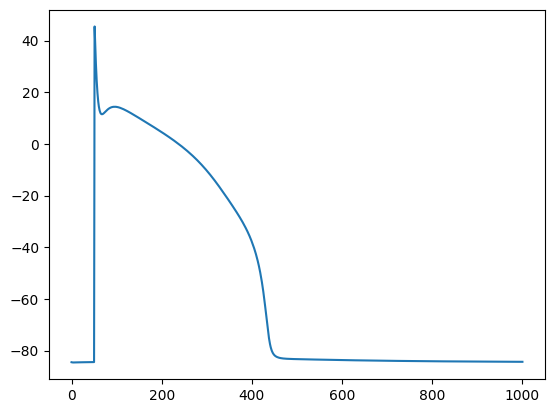

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(d.time(), d['membrane.V'])
plt.show()